# Introduction to Bioinformatics

## 05 - Human variation data

In this practice session, we will deal with genome variation data. 

This notebook assumes that you have all the necessary packages and libraries installed. If you have not them installed by any chance, please refer to the preparation instructions that appear in the README.md file in the practical session 05 GitHub's page.

### FASTQ files

In order to have a whole view of the variant calling procedure, we will start assessing a FASTQ file obtained after the sequencing of a specific individual within the 1000g project.

The genome for this sample comes from an individual belonging to the Yoruba population and file is called ``SRR003265.filt.fastq.gz``. This has already been downloaded and you can find it in the directory "data" found in the P05 folder. Just FYI, below you have the command lines you could use to download and save the FASTQ file using your terminal.

```
!rm -f data/SRR003265.filt.fastq.gz 2>/dev/null

!wget -P data/ -nd ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/sequence_read/SRR003265.filt.fastq.gz
```

Further genomes and variation data for different populations from the same project can be checked and are available in the [1000 genomes database](https://www.internationalgenome.org/data-portal/sample)
 

The FASTQ file contains info with quality scores for each read. For example:

```
@SRR003265.818 3042NAAXX:3:1:1926:1464 length=51
GAAAAAAATCCGTGTATAGATGGACCTGCACAGTTTAAACCTGTGTTGTTC
+
IIIIIIIIIIIIIIIIIII:IIIIIIIIIDIIIIIICI-7BII?IAIIII8
```

The symbols in the last row contain the Phred quality scores. From lower to higher quality:
```
!"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~
```


#### Opening and reading FASTQ files

First let us open and read the file. It is gzipped, so we need to take this into account and import the ``gzip`` python module as well as Biopython to parse the read sequences inside the FASTQ file.

In [30]:
import gzip

from Bio import SeqIO

recs = SeqIO.parse(gzip.open('data/SRR003265.filt.fastq.gz', 'rt', encoding='utf-8'), 'fastq')
rec = next(recs)
print("This is the ID for the read: ",rec.id,"\n")
print("This is its description: ",rec.description,"\n")
print("This is its sequence: ",rec.seq,"\n")
print("This is a dictionary having the phred quality scores (key) for each nucleotide sequenced in this read (values): ", rec.letter_annotations)

This is the ID for the read:  SRR003265.31 

This is its description:  SRR003265.31 3042NAAXX:3:1:1252:1819 length=51 

This is its sequence:  GGGAAAAGAAAAACAAACAAACAAAAACAAAACACAGAAACAAAAAAACCA 

This is a dictionary having the phred quality scores (key) for each nucleotide sequenced in this read (values):  {'phred_quality': [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 30, 23, 40, 32, 35, 29, 40, 16, 40, 40, 32, 35, 31, 40, 40, 39, 22, 40, 24, 20, 28, 31, 12, 31, 10, 22, 28, 13, 26, 20, 23, 23]}


#### Nuleotide read distribution

If we were to find the distribution of the nucleotide reads, we could achieve this with this piece of code. 

In [33]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from collections import defaultdict

recs = SeqIO.parse(gzip.open('data/SRR003265.filt.fastq.gz', 'rt', encoding='utf-8'), 'fastq')

# let us define a default dictionary of integers. 
# The defauldict is a useful way to simplify the creation of dictionaries
cnt = defaultdict(int)
for rec in recs:
    for letter in rec.seq:
        cnt[letter] += 1
tot = sum(cnt.values())
for letter, cnt in cnt.items():
    print('%s: %.2f%% %d' % (letter, 100. * cnt / tot, cnt))


G: 20.68% 5359334
A: 28.60% 7411965
C: 21.00% 5444053
T: 29.58% 7666885
N: 0.14% 37289


#### Evaluating the Ns

Sequencers cannot always identify or base call all nucleotides from a read. That is why sometimes we can see reads having "N" nucleotides. The amount of Ns will be much higher in an unfiltered FASTQ file that directly comes from the sequencer. 

Let us plot the distribution of Ns according to its read position. For this purpose we will need to import plot and visualization libraries (seaborn and matplotlib)

(1.0, 51.0)

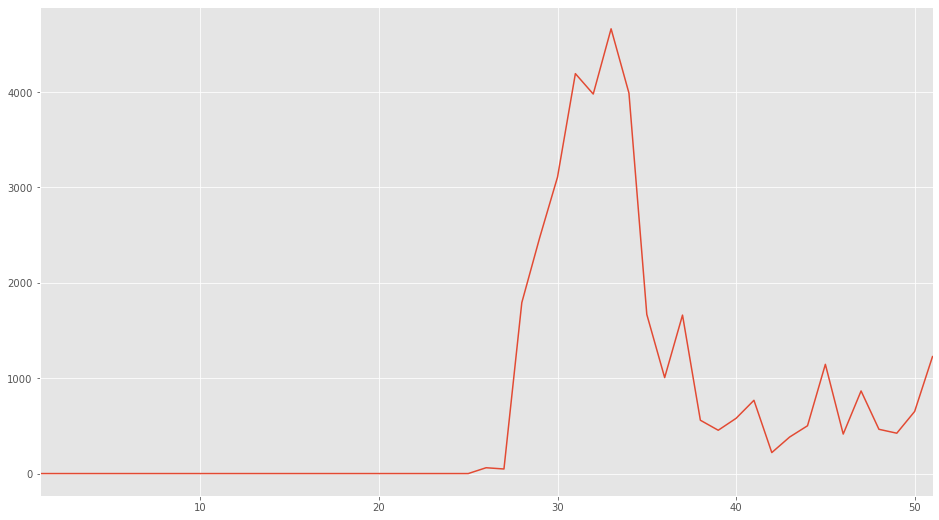

In [34]:
recs = SeqIO.parse(gzip.open('data/SRR003265.filt.fastq.gz', 'rt', encoding='UTF-8'), 'fastq')
n_cnt = defaultdict(int)
for rec in recs:
    for i, letter in enumerate(rec.seq):
        pos = i + 1
        if letter == 'N':
            n_cnt[pos] += 1
seq_len = max(n_cnt.keys())
positions = range(1, seq_len + 1)
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(positions, [n_cnt[x] for x in positions])
ax.set_xlim(1, seq_len)

#### Quality assessment

Now let us evaluate the quality of our reads.

In [36]:
recs = SeqIO.parse(gzip.open('data/SRR003265.filt.fastq.gz', 'rt', encoding='utf-8'), 'fastq')
cnt_qual = defaultdict(int)
for rec in recs:
    for i, qual in enumerate(rec.letter_annotations['phred_quality']):
        if i < 25:
            continue
        cnt_qual[qual] += 1
tot = sum(cnt_qual.values())
for qual, cnt in cnt_qual.items():
    print('%d: %.2f%% %d' % (qual, 100. * cnt / tot, cnt))

40: 22.76% 3007221
16: 2.05% 270431
32: 1.03% 136763
35: 0.91% 120704
31: 1.08% 142464
39: 0.78% 102568
22: 1.59% 209905
24: 1.46% 193259
20: 1.73% 228923
28: 1.23% 162226
12: 2.35% 309918
10: 4.95% 654154
13: 2.28% 301033
26: 1.33% 176263
23: 1.52% 201164
37: 0.84% 111179
34: 0.95% 125624
21: 1.66% 219602
30: 1.13% 149449
33: 0.99% 131291
25: 1.40% 184846
17: 1.97% 259779
38: 0.80% 106290
4: 4.77% 630923
36: 0.88% 115701
18: 1.88% 248982
11: 2.41% 318303
19: 1.81% 239621
5: 4.88% 645266
9: 2.51% 332259
3: 4.04% 533458
27: 1.28% 168902
8: 2.53% 334410
29: 1.17% 154892
15: 2.12% 280719
7: 2.51% 331743
2: 3.77% 498679
14: 2.20% 291341
6: 2.50% 330834
1: 1.52% 200558
0: 0.40% 52229


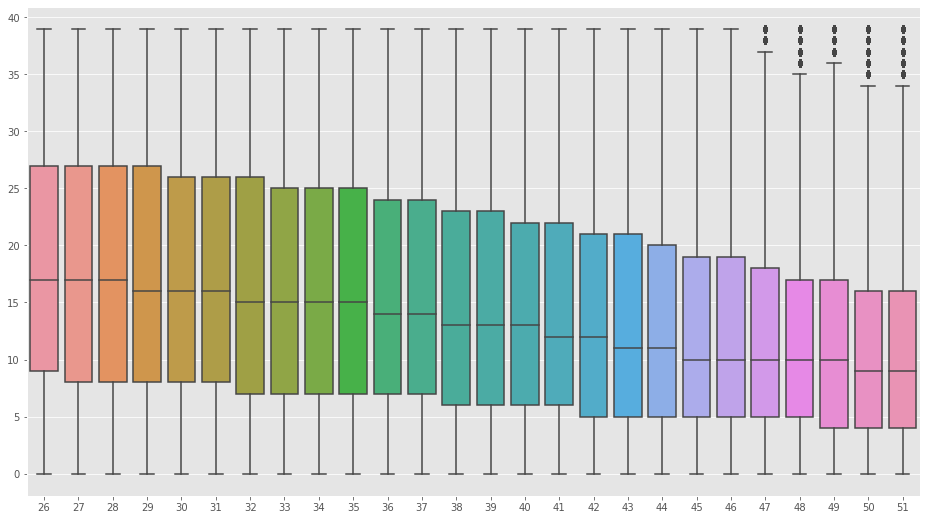

In [37]:
recs = SeqIO.parse(gzip.open('data/SRR003265.filt.fastq.gz', 'rt', encoding='utf-8'), 'fastq')
qual_pos = defaultdict(list)
for rec in recs:
    for i, qual in enumerate(rec.letter_annotations['phred_quality']):
        if i < 25 or qual == 40:
            continue
        pos = i + 1
        qual_pos[pos].append(qual)
vps = []
poses = list(qual_pos.keys())
poses.sort()
for pos in poses:
    vps.append(qual_pos[pos])
fig, ax = plt.subplots(figsize=(16,9))
sns.boxplot(data=vps, ax=ax)
ax.set_xticklabels([str(x) for x in range(26, max(qual_pos.keys()) + 1)])
pass

### Variant Call Format (VCF) files

After obtaining the FASTQ files, the sequences need to be aligned to a reference genome by creating a BAM or CRAM file. The latest reference genome is known as hg38 (GRCh38), and the previous version hg19 (GRCh37). It is important to be aware of which version of the reference genome has been used for the alignment as the genome coordinates will be needed for downstream variant analyses.

Finally, to identify variation data, the aligned reads are compared to the reference genome and the positions where they differ will be written into a VCF file.

In this section, we will learn how to parse, filter and extract information from VCF files using Python.

A VCF file stores sequence variation data (simple variation types such as SNPs, indels, etc). It is often the output file from a NGS analysis pipeline or the GWAS analysis pipeline.

Example of VCF file:


```
##fileformat=VCFv4.3
##reference=file:///seq/references/1000GenomesPilot-NCBI36.fasta
##contig=<ID=20,length=62435964,assembly=B36,md5=f126cdf8a6e0c7f379d618ff66beb2da,species="Homo sapiens",taxonomy=x>
##INFO=<ID=DP,Number=1,Type=Integer,Description="Total Depth">
##INFO=<ID=AF,Number=A,Type=Float,Description="Allele Frequency">
##INFO=<ID=DB,Number=0,Type=Flag,Description="dbSNP membership, build 129">
##FILTER=<ID=q10,Description="Quality below 10">
##FILTER=<ID=s50,Description="Less than 50% of samples have data">
##FORMAT=<ID=GT,Number=1,Type=String,Description="Genotype">
##FORMAT=<ID=DP,Number=1,Type=Integer,Description="Read Depth">
#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	NA00001	NA00002	NA00003
20	14370	rs6054257	G	A	29	PASS	DP=14;AF=0.5;DB	GT:DP	0/0:1	0/1:8	1/1:5
20	17330	.	T	A	3	q10	DP=11;AF=0.017	GT:DP	0/0:3	0/1:5	0/0:41
20	1110696	rs6040355	A	G,T	67	PASS	DP=10;AF=0.333,0.667;DB	GT:DP	0/2:6	1/2:0	2/2:4
20	1230237	.	T	.	47	PASS	DP=13	GT:DP	0/0:7	0/0:4	./.:.

```

The header contains meta-information and it is preceded by a pair of hashes. General properties such as used version of VCF format, used reference genome, creation date, whether the data is phased and descriptions of INFO fields.

Then last header line starting with 1 hash, always contains the same fields in positions 1 to 8:

``
CHROM: name of the reference sequence on which the variation is being called.
POS: 1-based position of the variation on that sequence.
ID: name of the variation (e.g. dbSNP rs ID) or "." if unkown.
REF: the reference bases of the reference sequence.
ALT: list of alternative alleles at this position replacing the REF sequence 
QUAL: quality score
FILTER: if that variant call has passed the quality filter (PASS). If filter not met, the criteria not met is specified.
INFO: extra fields given by key-value pairs, separated by semicolons. Common INFO fields include: AC/AF allele count/frequency of each ALT allele, listed in the same order.  AN: total number of alleles in the called genotypes.
``

The FORMAT and SAMPLE IDs columns are present if genotypes are given.

The body of the VCF containing the actual variation data is comprised of tab-separated rows. Each row represents a specific variant. 

Phasing is an important concept to have in mind when reading genotype data. In reality variants are not inherited individually but in larger chunks due to how recombination works between generations. This combination of variants that are inherited together are known as haplotypes. Historically, whole-genome sequencing generated a single consensus sequence without distinguishing between variants on homologous chromosomes. Phased sequencing, or genome phasing, addresses this limitation by identifying alleles on maternal and paternal chromosomes.



#### Getting the necessary data

We will be using data from the 1000g project, and again, the data has already been downloaded and you can find it in the directory "data" found in the P05 folder. The file is called ``genotypes.vcf.gz`` and it contains a VCF file with all variants found in chromosome 22 using the phase 3 pipeline of the 1000g project. Just FYI, below you have the command lines you could use to download and save the FASTQ file using your terminal.

```
!rm -f data/genotypes.vcf.gz 2>/dev/null

!tabix -fh ftp://ftp-
trace.ncbi.nih.gov/1000genomes/ftp/release/20130502/supporting/vcf_with_sample_level_annotation/ALL.chr22.phase3_shapeit2_mvncall_integrated_v5_extra_anno.20130502.genotypes.vcf.gz 22:1-17000000|bgzip -c > data/genotypes.vcf.gz

!tabix -p vcf data/genotypes.vcf.gz
```

#### Opening and reading VCF files

Let's open and read the gzip compressed VCF file. Since this is a quite big file, we only the first 500000 characters to have an initial idea of how this VCF file looks like.

In [5]:
import gzip

VCF_file_path = 'data/genotypes.vcf.gz'

with gzip.open(VCF_file_path, 'rt') as f:   
    print(f.read(500000))

##fileformat=VCFv4.1
##FILTER=<ID=PASS,Description="All filters passed">
##fileDate=20140730
##reference=ftp://ftp.1000genomes.ebi.ac.uk//vol1/ftp/technical/reference/phase2_reference_assembly_sequence/hs37d5.fa.gz
##source=1000GenomesPhase3Pipeline
##contig=<ID=1,assembly=b37,length=249250621>
##contig=<ID=2,assembly=b37,length=243199373>
##contig=<ID=3,assembly=b37,length=198022430>
##contig=<ID=4,assembly=b37,length=191154276>
##contig=<ID=5,assembly=b37,length=180915260>
##contig=<ID=6,assembly=b37,length=171115067>
##contig=<ID=7,assembly=b37,length=159138663>
##contig=<ID=8,assembly=b37,length=146364022>
##contig=<ID=9,assembly=b37,length=141213431>
##contig=<ID=10,assembly=b37,length=135534747>
##contig=<ID=11,assembly=b37,length=135006516>
##contig=<ID=12,assembly=b37,length=133851895>
##contig=<ID=13,assembly=b37,length=115169878>
##contig=<ID=14,assembly=b37,length=107349540>
##contig=<ID=15,assembly=b37,length=102531392>
##contig=<ID=16,assembly=b37,length=90354753>
##contig

Now, in order to actually parse the data easily, we are going to import the vcf python module. We create a VCF Reader, which is nothing more than an iterator which gives you one line (one variant) one after the other.

In [6]:
import vcf

vcf_reader = vcf.Reader(filename = VCF_file_path, compressed = True)

#### Metadata

VCF info regarding the metadata can be accessed as follows. It takes a form of a simple key value pairing within dictionary.

In [7]:
print(vcf_reader.metadata)
print('*' * 50)

for key, value in vcf_reader.metadata.items():
    print('%s: %s' % (key, value))

OrderedDict([('fileformat', 'VCFv4.1'), ('fileDate', '20140730'), ('reference', 'ftp://ftp.1000genomes.ebi.ac.uk//vol1/ftp/technical/reference/phase2_reference_assembly_sequence/hs37d5.fa.gz'), ('source', ['1000GenomesPhase3Pipeline'])])
**************************************************
fileformat: VCFv4.1
fileDate: 20140730
reference: ftp://ftp.1000genomes.ebi.ac.uk//vol1/ftp/technical/reference/phase2_reference_assembly_sequence/hs37d5.fa.gz
source: ['1000GenomesPhase3Pipeline']


Now, to get the definitions for the info fields present in the VCF file, they can be retrieved the same way by iterating through the below infos dictionary. So again "key/value" pairing, ie. "name/info".

In this case, there are a great deal of infos. Probably, the majority are not going to be too relevant, but others may be important, such as AC and AF.

```AC [Integer]: Total number of alternate alleles in called genotypes```

```AF [Float]: Estimated allele frequency in the range (0,1)```

In [8]:
for name, info in vcf_reader.infos.items():
    print('%s [%s]: %s' % (name, info.type, info.desc))

CIEND [Integer]: Confidence interval around END for imprecise variants
CIPOS [Integer]: Confidence interval around POS for imprecise variants
CS [String]: Source call set.
END [Integer]: End coordinate of this variant
IMPRECISE [Flag]: Imprecise structural variation
MC [String]: Merged calls.
MEINFO [String]: Mobile element info of the form NAME,START,END<POLARITY; If there is only 5' OR 3' support for this call, will be NULL NULL for START and END
MEND [Integer]: Mitochondrial end coordinate of inserted sequence
MLEN [Integer]: Estimated length of mitochondrial insert
MSTART [Integer]: Mitochondrial start coordinate of inserted sequence
SVLEN [Integer]: Difference in length between REF and ALT alleles
SVTYPE [String]: Type of structural variant
TSD [String]: Precise Target Site Duplication for bases, if unknown, value will be NULL
AC [Integer]: Total number of alternate alleles in called genotypes
AF [Float]: Estimated allele frequency in the range (0,1]
NS [Integer]: Number of sample

We can also retrieve the variant and sample level information from the INFO and FORMAT fields the following way:

In [11]:
print('Variant Level information')
infos = v.infos
for info in infos:
    print(info)

print("\n")
print('Sample Level information')
fmts = v.formats
for fmt in fmts:
    print(fmt)

Variant Level information
CIEND
CIPOS
CS
END
IMPRECISE
MC
MEINFO
MEND
MLEN
MSTART
SVLEN
SVTYPE
TSD
AC
AF
NS
AN
ASN_AF
EUR_AF
AFR_AF
AMR_AF
SAN_AF
DP


Sample Level information
GT
DP


#### Actual variation data

To get into the actual variation data contained in the VCF, we will access the sample data.

In [13]:
print("The number of samples in the VCF file is: ",len(vcf_reader.samples))

## As we have 2504 samples, we only show the first 10 as example.
print(vcf_reader.samples[:10])

The number of samples in the VCF file is:  2504
['HG00096', 'HG00097', 'HG00099', 'HG00100', 'HG00101', 'HG00102', 'HG00103', 'HG00105', 'HG00106', 'HG00107']


As example, to check a single variant call within the VCF file, we call  the python ```next``` function.

The attributes of a Record are the 8 fixed fields from the VCF spec::

* ``Record.CHROM``
* ``Record.POS``
* ``Record.ID``
* ``Record.REF``
* ``Record.ALT``
* ``Record.QUAL``
* ``Record.FILTER``
* ``Record.INFO``


Note: The next function creates an iterator, and print the items one by one. 

In [15]:
single_variant = next(vcf_reader)
print('Chromosome %s at %d: %s --> %s (%s)' % (single_variant.CHROM, single_variant.POS, single_variant.REF, single_variant.ALT, single_variant.ID))
print("\n")
print(type(single_variant.ALT))
print("\n")
print(single_variant.INFO)

Chromosome 22 at 16050115: G --> [A] (None)


<class 'list'>


{'AC': [32], 'AF': [0.00638978], 'AN': 5008, 'NS': 2504, 'DP': [11468], 'ASN_AF': [0.0], 'AMR_AF': [0.0014], 'SAS_AF': [''], 'EUR_AF': [0.0], 'EAS_AF': [''], 'AFR_AF': [0.0234], 'SAN_AF': [0.0]}


Remember that since vcf_reader is an iterator, a simple for loop like the one below could be used to iterate through the entire VCF file, so to iterate through all variants one after the other. However, since these VCF files tend to be big files, this would consume a lot of memory, so we will not try that now. (Note: the VCF python module is quite slow)

```
for record in vcf_reader:
     print(record)
```



Other useful information can be retrieved such as the type of variant, the actual alleles for that variant, check boolean fields, etc.

In [45]:
print("The type of variant is:", single_variant.var_type, "and its subtype is:",single_variant.var_subtype)
print("Is this a SNP?", single_variant.is_snp,". Is this an indel?", single_variant.is_indel)
print("The alleles for this single variant are:",single_variant.alleles)

The type of variant is: snp and its subtype is: ts
Is this a SNP? True . Is this an indel? False
The alleles for this single variant are: ['G', A]


Now for the specific call variant, the number of samples and actual genotyping for each sample can be retrieved)

In [18]:
print(len(single_variant.samples))
print(single_variant.samples[:10])   ## as an example, only the first 10 samples are shown as otherwise would be 2504

2504
[Call(sample=HG00096, CallData(GT=0|0, DP=1)), Call(sample=HG00097, CallData(GT=0|0, DP=2)), Call(sample=HG00099, CallData(GT=0|0, DP=2)), Call(sample=HG00100, CallData(GT=0|0, DP=4)), Call(sample=HG00101, CallData(GT=0|0, DP=5)), Call(sample=HG00102, CallData(GT=0|0, DP=3)), Call(sample=HG00103, CallData(GT=0|0, DP=3)), Call(sample=HG00105, CallData(GT=0|0, DP=5)), Call(sample=HG00106, CallData(GT=0|0, DP=6)), Call(sample=HG00107, CallData(GT=0|0, DP=11))]


To access information from the first sample, the following can be done.

In [19]:
call = single_variant.samples[0]
print(call)
print(call.sample)
print(call.gt_alleles)
print(call.gt_bases)
print(call.is_variant, call.is_het)

Call(sample=HG00096, CallData(GT=0|0, DP=1))
HG00096
['0', '0']
G|G
False False


And if interested in a specific individual/sample, eg. HG00107, the genotype function can be used as below.

In [20]:
print(single_variant.genotype('HG00107'))

Call(sample=HG00107, CallData(GT=0|0, DP=11))


If only interested in individuals that do not have the variant at all (homozigous reference). If it is a rare variant, the list is going to be large as it will contain most people without the variant. 

In [21]:
print(single_variant.get_hom_refs()[:3])  ## only showing the first 3 individuals homozigous for the reference allele.

[Call(sample=HG00096, CallData(GT=0|0, DP=1)), Call(sample=HG00097, CallData(GT=0|0, DP=2)), Call(sample=HG00099, CallData(GT=0|0, DP=2))]


If interested in individuals with the variants in heterozigous state:

In [23]:
print(single_variant.get_hets())

[Call(sample=HG01363, CallData(GT=0|1, DP=3)), Call(sample=HG02334, CallData(GT=0|1, DP=5)), Call(sample=HG02343, CallData(GT=0|1, DP=6)), Call(sample=HG02497, CallData(GT=1|0, DP=4)), Call(sample=HG02536, CallData(GT=1|0, DP=2)), Call(sample=HG02574, CallData(GT=0|1, DP=0)), Call(sample=HG02623, CallData(GT=1|0, DP=9)), Call(sample=HG02870, CallData(GT=1|0, DP=7)), Call(sample=HG03052, CallData(GT=0|1, DP=7)), Call(sample=HG03058, CallData(GT=1|0, DP=7)), Call(sample=HG03084, CallData(GT=1|0, DP=9)), Call(sample=HG03354, CallData(GT=0|1, DP=6)), Call(sample=HG03367, CallData(GT=1|0, DP=1)), Call(sample=HG03391, CallData(GT=1|0, DP=3)), Call(sample=HG03432, CallData(GT=0|1, DP=0)), Call(sample=HG03473, CallData(GT=0|1, DP=3)), Call(sample=NA18516, CallData(GT=0|1, DP=2)), Call(sample=NA18519, CallData(GT=1|0, DP=8)), Call(sample=NA18858, CallData(GT=0|1, DP=2)), Call(sample=NA18874, CallData(GT=0|1, DP=8)), Call(sample=NA18908, CallData(GT=1|0, DP=4)), Call(sample=NA19027, CallData(GT=

Or individuals with two copies of variant (homozigous alternative). In this case, none.

In [25]:
print(single_variant.get_hom_alts())

[]


Or get the 'unknowns' as sometimes a high quality calling is not possible due to unsufficient data for that sample for example.

In [26]:
print(single_variant.get_unknowns())

[]


Number of variants called, , number of hetorozigous and homozigous for the variant/alternate allele, and 

In [28]:
print(single_variant.num_called)

2504


Number of homzigous reference individuals:

In [29]:
print(single_variant.num_hom_ref)

2472


Number of hetorozigous individuals for the variant/alternate allele

In [30]:
print(single_variant.num_het)

32


Number of homozigous individuals for the variant/alternate allele:

In [31]:
print(single_variant.num_hom_alt)

0


Number of individuals with unknown genotypes:

In [32]:
print(single_variant.num_unknown)

0


#### Building DNA substitution matrix

We are going to run the below piece of code to build a DNA substitution matrix that for each entry it will provide the percentage of that particular DNA substitution. 

In [41]:
from itertools import islice
from ipywidgets import FloatProgress

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import vcf 

from collections import defaultdict

%matplotlib inline
import seaborn as sns

plt.style.use('ggplot')

In [35]:
BASES = list('ACGT')   ## create a list with the four DNA nucleotides

dna_sub_matrix = pd.DataFrame(0, index = BASES, columns = BASES)  ## create a dataframa with 4 rows and 4 columns initializing it to 0.

N_RECORDS = 5000   ## only iterate through the first 5000 records since the module is quite slow
progress_bar = FloatProgress(max = N_RECORDS)
display(progress_bar)

## we will iterate through the vcf.Reader iterator, but only through the first 5000 records. That's why we use the islice function from the itertools module, in order to slice an itator (vcf.Reader) to a limited number (in our case, we chose 5000)
for i, record in enumerate(islice(vcf.Reader(filename = VCF_file_path, compressed = True), N_RECORDS)):

    progress_bar.value = i

    ## in this case, we are interested only in SNPs
    if record.is_snp:
        ## for each SNP record, we will obtain the actual alternate allele and its frequency of that nucleotide, which is found in the VCF's INFO column
        for alt_allele, frequency in zip(record.ALT, record.INFO['AF']):
            ## then we start populating the matrix. Reference alleles will be the column and the alternate alleles will be the row. And then it is increased by the frequency of that variants
            dna_sub_matrix.loc[record.REF, alt_allele.sequence] += frequency

## in order to normalize it and that everything sum up to 1 (to describe some kind of probabilities)
## so what is the probability of each of the reference nucleotides substituting to each of the other nucleotides.
dna_sub_matrix = dna_sub_matrix.div(dna_sub_matrix.sum(axis = 1), axis = 0)
display(dna_sub_matrix)

FloatProgress(value=0.0, max=5000.0)

,A,C,G,T
A,0.000000,0.150643,0.779867,0.069490
C,0.163673,0.000000,0.170707,0.665620
G,0.579875,0.161559,0.000000,0.258566
T,0.174995,0.591413,0.233592,0.000000


#### Heat map of common nucleotide substitutions

And now we are going to plot a heat map to see what are the most common subsitutions.

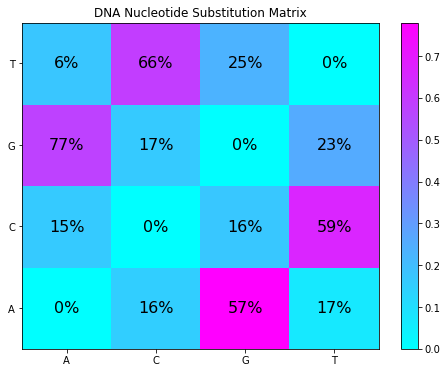

In [40]:
fig, ax = plt.subplots(figsize = (8, 6))
heatmap = ax.pcolor(dna_sub_matrix, cmap = 'cool', vmin = 0)
fig.colorbar(heatmap)

ax.set_xticks(np.arange(len(BASES)) + 0.5)
ax.set_xticklabels(BASES)
ax.set_yticks(np.arange(len(BASES)) + 0.5)
ax.set_yticklabels(BASES)

for i in range(len(BASES)):
    for j in range(len(BASES)):
        ax.text(i + 0.5, j + 0.5, '%d%%' % (100 * dna_sub_matrix.iloc[i, j]), ha = 'center', va = 'center', color = 'black',
                fontsize = 16)

_ = ax.set_title('DNA Nucleotide Substitution Matrix')

In-group transitions of Purines (Adenine & Guanine) and Pyrimidines (Cytosine & Thymine) are more common than cross-group transversions.

![alt text](figures/TTs.png "Title")

#### Distribution of total read depth

We could also be interested in the total read depth (DP) 

In [46]:
f = vcf.Reader(filename='data/genotypes.vcf.gz')

sample_dp = defaultdict(int)
for rec in f:
    if not rec.is_snp or len(rec.ALT) != 1:
        continue
    for sample in rec.samples:
        dp = sample['DP']
        if dp is None:
            dp = 0
        dp = int(dp)
        sample_dp[dp] += 1

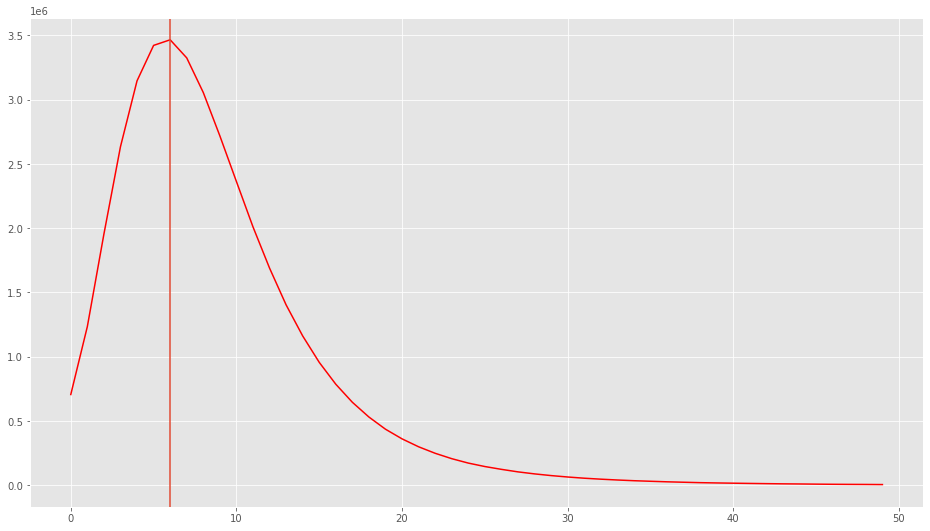

In [47]:
dps = list(sample_dp.keys())
dps.sort()
dp_dist = [sample_dp[x] for x in dps]
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(dp_dist[:50], 'r')
ax.axvline(dp_dist.index(max(dp_dist)))

### Manhattan plot for a GWAS analysis

A genome-wide association study (GWAS) is an approach to associate specific genetic variations with particular diseases. 

We are going to plot a Manhattan plot to display significant SNPs associated to a specific phenotype. Each point in this scatter plot is a SNP laid out across the human chromosomes from left to right, and the heights correspond to the strength of the association to disease or trait. You’ll see that the strongest associations (highlighted in green) form neat peaks where nearby correlated SNPs all show the same signal.

In order to view the figures in this notebook it is necessary to included the following line:

In [48]:
%matplotlib inline

#Here we set the dimensions for the figures in this notebook
import matplotlib as mpl
mpl.rcParams['figure.dpi']=150
mpl.rcParams['savefig.dpi']=150
mpl.rcParams['figure.figsize']=7.375, 3.375

#### Data used 

We will use anthropometric data from the Genetic Investigation of ANthropometric Traits (GIANT) consortium:
https://www.broadinstitute.org/collaboration/giant/index.php/GIANT_consortium_data_files

Results are described in Randall JC, Winkler TW, Kutalik Z, Berndt SI, Jackson AU, Monda KL, et al. (2013) Sex-stratified Genome-wide Association Studies Including 270,000 Individuals Show Sexual Dimorphism in Genetic Loci for Anthropometric Traits. PLoS Genet 9(6): e1003500. doi:10.1371/journal.pgen.1003500
http://journals.plos.org/plosgenetics/article?id=10.1371/journal.pgen.1003500

For this plot, we will usi one trait (hip circumference) measured in two groups: males and females. These are the files listed under Sex Stratified Anthropometrics subsection. For example, here is one of the files called GIANT_Randall2013PlosGenet_stage1_publicrelease_HapMapCeuFreq_HIP_WOMEN_N.txt and the first couple of lines looks like this:

```MarkerName A1 A2 Freq.Hapmap.Ceu BETA SE.2gc P.2gc N
rs4747841 a g 0.55 0.0054 0.0080 0.50 40354.8
rs4749917 t c 0.45 -0.0054 0.0080 0.50 40354.8
rs737656 a g 0.3667 0.0035 0.0083 0.67 40354.7
rs737657 a g 0.3583 0.0020 0.0083 0.81 40351.8```

The P.2gc column is the p-value of the association test. For the Manhattan plot, besides the p-value, we also need to know SNPs chromosome and genomic position. To obtain the chromosome number and position for each SNP, a python script called LiftRsNumber.py from this Goncalo Abecasis’ group http://genome.sph.umich.edu/wiki/LiftOver was used.

Since we only need to know the SNP's chromosome, position, and p-value, the following files located in the data folder were generated out of the one above: HIP_WOMEN_chr_pos_rs_pval.txt, where column 1 = chromosome, 2=position, 3=SNP rs number, 4=p-value

```10 9918166 rs4747841 0.5
10 9918296 rs4749917 0.5
10 98252982 rs737656 0.67
10 98253133 rs737657 0.81```

We'll beging making the plots by importing the data. 

In [52]:
import numpy as np
hip_m=np.genfromtxt('data/HIP_MEN_chr_pos_rs_pval.txt', dtype=None)
hip_w=np.genfromtxt('data/HIP_WOMEN_chr_pos_rs_pval.txt', dtype=None)

<ipython-input-52-25d4dc96930b>:2: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  hip_m=np.genfromtxt('data/HIP_MEN_chr_pos_rs_pval.txt', dtype=None)
<ipython-input-52-25d4dc96930b>:3: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  hip_w=np.genfromtxt('data/HIP_WOMEN_chr_pos_rs_pval.txt', dtype=None)


Import the module for Manhattan plots

In [53]:
from assocplots.manhattan import *

In [54]:
chrs = [str(i) for i in range(1,23)]
chrs_names = np.array([str(i) for i in range(1,23)])
chrs_names[1::2] = ''

cmap = plt.get_cmap('viridis')
colors = [cmap(i) for i in [0.0,0.33,0.67,0.90]]

# Alternatively you can input colors by hand
from matplotlib.colors import hex2color
colors = ['#1b9e77', "#d95f02", '#7570b3', '#e7298a']
# Converting from HEX into RGB
colors = [hex2color(colors[i]) for i in range(len(colors))]

/home/angel/anaconda3/lib/python3.8/site-packages/assocplots/manhattan.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,1,1)
/home/angel/anaconda3/lib/python3.8/site-packages/assocplots/manhattan.py:87: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,1,1)
/home/angel/anaconda3/lib/python3.8/site-packages/assocplots/manhattan.py:124: MatplotlibDeprecationWarning: Adding an axes using the same argume

/home/angel/anaconda3/lib/python3.8/site-packages/assocplots/manhattan.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,1,1)
/home/angel/anaconda3/lib/python3.8/site-packages/assocplots/manhattan.py:87: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,1,1)
/home/angel/anaconda3/lib/python3.8/site-packages/assocplots/manhattan.py:124: MatplotlibDeprecationWarning: Adding an axes using the same argume

/home/angel/anaconda3/lib/python3.8/site-packages/assocplots/manhattan.py:178: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,1,1)


0

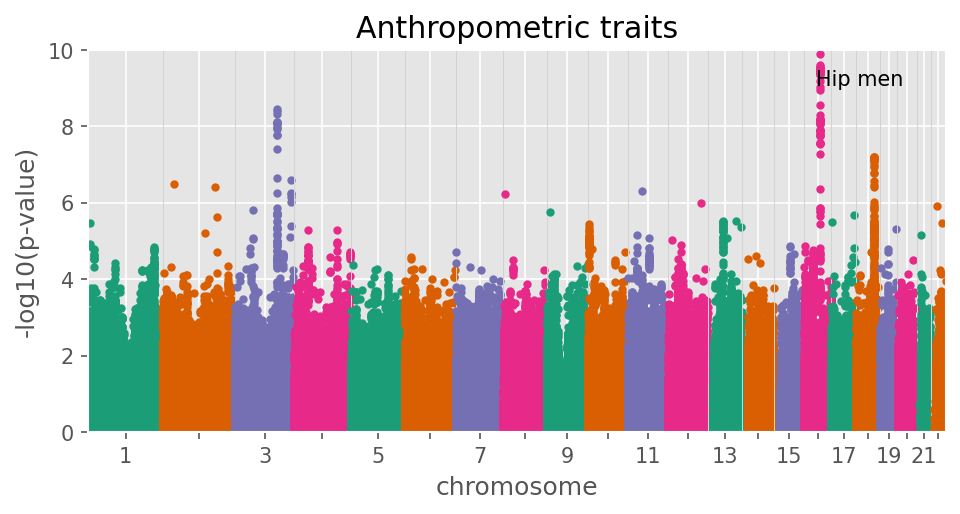

In [55]:
# hip_m['f0'].astype(str) is required in Python 3, since it reads unicode string by default

manhattan(     hip_m['f3'], hip_m['f1'], hip_m['f0'].astype(str), 'Hip men',
               plot_type='single',
               chrs_plot=[str(i) for i in range(1,23)],
               chrs_names=chrs_names,
               cut = 0,
               title='Anthropometric traits',
               xlabel='chromosome',
               ylabel='-log10(p-value)',
               lines= [],
               colors = colors,
               scaling = '-log10')

### References

The FASTQ section has been adapted from [https://github.com/PacktPublishing/Bioinformatics-with-Python-Cookbook-Second-Edition](https://github.com/PacktPublishing/Bioinformatics-with-Python-Cookbook-Second-Edition), Chapter 2.

For further information to explore and analyse genetic variation you can also check the functions available in `scikit-allel` [here](http://alimanfoo.github.io/2017/06/14/read-vcf.html)

VCF explanation by Colleen Saunders can be found [here](https://training.h3abionet.org/IBT_2017/wp-content/uploads/2017/06/Module5_Session4_part3.mp4):

The GWAS Manhattan plot section has been adapted from https://github.com/khramts/assocplots

